## importing 

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.datasets import mnist
from tensorflow.keras.models import load_model
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.layers import Conv2D, Dropout, Flatten, MaxPooling2D, Dense, BatchNormalization, MaxPool2D
from tensorflow.keras.optimizers.legacy import SGD, Adam, Adamax
import tensorflow as tf
import seaborn as sns

%matplotlib inline

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print(x_train.shape)
print(y_train[10])
print(x_test.shape)

(60000, 28, 28)
3
(10000, 28, 28)


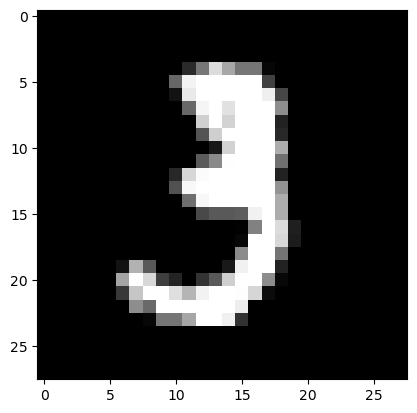

In [5]:
plt.imshow(x_train[10], cmap='gray')

### Preprocessing

<p>Reshaping </p>

In [6]:
x_train = x_train.reshape(-1, 28, 28, 1)  # making it into 28x28 with 1 channel for grayscale and feeding it into the ConvModel
x_test = x_test.reshape(-1, 28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


In [7]:
print(x_train.shape)

x_train = x_train/255 # normalizing the image since grayscale images are just 2D images in the range of 0 to 255
x_test = x_test/255  # so thats why we are bringing the range in between 0 and 1 which is done by dividing the matrix by 255

(60000, 28, 28, 1)


In [8]:
x_train.dtype

dtype('float32')

In [13]:
num_classes = y_train.shape[1]

### Categorical data needs to be converted into numerical format using OneHotEncoding

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
y_train[0]

5

In [12]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [23]:
y_train[1]

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [24]:
# y_train = y_train.reshape(-1, 1)
# onehot_encoder = OneHotEncoder()
# y_train_encoded = onehot_encoder.fit_transform(y_train).toarray()
# y_train_encoded.astype('float32')
# print(y_train_encoded[:10])
# print(y_train_encoded.dtype)

In [25]:
# y_test = y_test.reshape(-1, 1)
# y_test_encoded = onehot_encoder.fit_transform(y_test).toarray()
# y_test_encoded.astype('float32')
# print(y_test_encoded[0])
# print(y_test_encoded.dtype)

In [180]:
model = tf.keras.models.Sequential()
model.add(Conv2D(
    32,
    kernel_size=(3, 3),
    activation='relu',
    padding='SAME',
    input_shape = (28, 28, 1),
))

model.add(MaxPooling2D(
    pool_size=(2, 2),
))

model.add(Conv2D(
    64,
    kernel_size=(3, 3),
    activation='relu',
    padding='SAME',
))

model.add(MaxPooling2D(
    pool_size=(2, 2),
))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(
    128, 
    activation='relu',
))

model.add(Dropout(0.5))

model.add(Dense(
    10,
    activation='softmax',  # using softmax since that works the best with multilabel classification and yields the highest probability 
))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=SGD(learning_rate=0.01))

In [181]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 7, 7, 64)          0         
 ng2D)                                                           
                                                                 
 dropout_13 (Dropout)        (None, 7, 7, 64)          0         
                                                                 
 flatten_6 (Flatten)         (None, 3136)            

In [182]:
batch_size = 32
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=20,
    verbose=1,
    validation_data=(x_test, y_test)
)

Epoch 1/20
1875/1875 [==============================] - 22s 11ms/step - loss: 0.6432 - accuracy: 0.7921 - val_loss: 0.1904 - val_accuracy: 0.9444
Epoch 2/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2124 - accuracy: 0.9357 - val_loss: 0.1235 - val_accuracy: 0.9605
Epoch 3/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1570 - accuracy: 0.9524 - val_loss: 0.0914 - val_accuracy: 0.9722
Epoch 4/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1381 - accuracy: 0.9595 - val_loss: 0.0869 - val_accuracy: 0.9733
Epoch 5/20
1875/1875 [==============================] - 22s 11ms/step - loss: 0.1284 - accuracy: 0.9625 - val_loss: 0.0753 - val_accuracy: 0.9750
Epoch 6/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1240 - accuracy: 0.9635 - val_loss: 0.0812 - val_accuracy: 0.9751
Epoch 7/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1231 - accuracy: 0.9654 - val_loss: 0.0703 -

In [49]:
score = model.evaluate(x_test, y_test, verbose=0)

In [50]:
print("Test Loss: ", str(round(score[0]*100, 2)) + str('%'))
print("Test Accuracy: ", str(round(score[1]*100, 2)) + str('%'))

Test Loss:  5.19%
Test Accuracy:  99.67%


In [51]:
def draw_learning_curve(history, keys=['f1', 'loss']):
    plt.figure(figsize=(20, 8))
    for i, key in enumerate(keys):
        plt.subplot(1, 2, i + 1)
        sns.lineplot(x = history.epoch, y = history.history[key])
        sns.lineplot(x = history.epoch, y = history.history['val_' + key])
        plt.title('learning curve')
        plt.ylabel(key.title())
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='best')
    plt.show()

In [52]:
plotting_data_history = history.history

test_loss = plotting_data_history['val_loss']
training_loss= plotting_data_history['loss']
test_accuracy = plotting_data_history['val_accuracy']
training_accuracy = plotting_data_history['accuracy']

epochs = range(1, len(test_loss) + 1)

NameError: name 'history' is not defined

In [53]:
plt.plot(epochs, test_loss, marker='X', label='test_loss')
plt.plot(epochs, training_loss, marker='X', label='training_loss')
plt.legend()
plt.show()

NameError: name 'epochs' is not defined

In [54]:
plt.plot(epochs, test_accuracy, marker='X', label='test_accuracy')
plt.plot(epochs, training_accuracy, marker='X', label='training_accuracy')
plt.legend()
plt.show()

NameError: name 'epochs' is not defined

In [14]:
input_shape = (28, 28, 1)

In [15]:
train_aug = ImageDataGenerator(
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    featurewise_center=False,
    zca_whitening=False,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode='nearest',
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_aug.fit(x_train)
train_gen = train_aug.flow(x_train, y_train, batch_size=64)

In [16]:
def fuck_my_life_model():
    return tf.keras.models.Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape = input_shape),
        Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25),

        Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
        Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
        Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        
        Flatten(),
          
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.4),
        
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        
        Dense(num_classes, activation = "softmax")
    ])

In [17]:
def callbacks(name): 
    return [ 
        EarlyStopping(monitor = 'loss', patience = 6), 
        ReduceLROnPlateau(monitor = 'loss', patience = 3), 
        ModelCheckpoint(f'./{name}.hdf5', save_best_only=True) # saving the best model
    ]

In [18]:
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [19]:
model = fuck_my_life_model()
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=[f1])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        1

In [57]:
learning_history = model.fit(
    train_gen,
    epochs=100,
    steps_per_epoch=x_train.shape[0] // 64,
    validation_data=(x_test, y_test),
    callbacks=callbacks('best_cnn'),
)

Epoch 1/100


2024-05-11 19:16:44.040901: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout_6/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-05-11 19:16:44.218460: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-05-11 19:16:45.084140: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f8080021110 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-11 19:16:45.084159: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti, Compute Capability 8.6
2024-05-11 19:16:45.095816: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1715435205.189112 3662752 device_compiler.h:186] Compiled cluster usi

937/937 [==============================] - 12s 8ms/step - loss: 0.4863 - f1: 0.8387 - val_loss: 0.0608 - val_f1: 0.9814 - lr: 0.0010
Epoch 2/100
 17/937 [..............................] - ETA: 5s - loss: 0.1329 - f1: 0.9670

/home/cse1053/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


937/937 [==============================] - 7s 7ms/step - loss: 0.1304 - f1: 0.9636 - val_loss: 0.0347 - val_f1: 0.9893 - lr: 0.0010
Epoch 3/100
937/937 [==============================] - 7s 7ms/step - loss: 0.0948 - f1: 0.9735 - val_loss: 0.0333 - val_f1: 0.9907 - lr: 0.0010
Epoch 4/100
937/937 [==============================] - 7s 7ms/step - loss: 0.0841 - f1: 0.9762 - val_loss: 0.0424 - val_f1: 0.9878 - lr: 0.0010
Epoch 5/100
937/937 [==============================] - 7s 8ms/step - loss: 0.0734 - f1: 0.9805 - val_loss: 0.0287 - val_f1: 0.9911 - lr: 0.0010
Epoch 6/100
937/937 [==============================] - 7s 8ms/step - loss: 0.0661 - f1: 0.9818 - val_loss: 0.0202 - val_f1: 0.9938 - lr: 0.0010
Epoch 7/100
937/937 [==============================] - 7s 7ms/step - loss: 0.0604 - f1: 0.9832 - val_loss: 0.0234 - val_f1: 0.9928 - lr: 0.0010
Epoch 8/100
937/937 [==============================] - 7s 7ms/step - loss: 0.0570 - f1: 0.9845 - val_loss: 0.0273 - val_f1: 0.9918 - lr: 0.0010
Epoc

937/937 [==============================] - 7s 7ms/step - loss: 0.0122 - f1: 0.9967 - val_loss: 0.0112 - val_f1: 0.9974 - lr: 1.0000e-04
Epoch 59/100
937/937 [==============================] - 6s 7ms/step - loss: 0.0111 - f1: 0.9969 - val_loss: 0.0112 - val_f1: 0.9973 - lr: 1.0000e-04
Epoch 60/100
937/937 [==============================] - 7s 7ms/step - loss: 0.0110 - f1: 0.9970 - val_loss: 0.0106 - val_f1: 0.9975 - lr: 1.0000e-04
Epoch 61/100
937/937 [==============================] - 7s 7ms/step - loss: 0.0101 - f1: 0.9974 - val_loss: 0.0107 - val_f1: 0.9973 - lr: 1.0000e-05
Epoch 62/100
937/937 [==============================] - 7s 7ms/step - loss: 0.0095 - f1: 0.9973 - val_loss: 0.0105 - val_f1: 0.9976 - lr: 1.0000e-05
Epoch 63/100
937/937 [==============================] - 7s 7ms/step - loss: 0.0108 - f1: 0.9972 - val_loss: 0.0106 - val_f1: 0.9973 - lr: 1.0000e-05


In [20]:
model = load_model('./best_cnn.hdf5', custom_objects={"f1": f1})

In [21]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test Loss: ", str(round(score[0]*100, 2)) + str('%'))
print("Test Accuracy: ", str(round(score[1]*100, 2)) + str('%'))

print(" Error: %.2f%%" % (100-score[1]*100))

Test Loss:  5.19%
Test Accuracy:  99.67%
 Error: 0.33%


In [70]:
model.save('mnist_cnn.h5')

/home/cse1053/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
classifier = load_model('mnist_cnn.h5', custom_objects={"f1": f1})

In [23]:
drawing=False
cv2.namedWindow('win')
black_image = np.zeros((256,256,3),np.uint8)
ix,iy=-1,-1

def draw_circles(event,x,y,flags,param):
    global ix,iy,drawing
    if event== cv2.EVENT_LBUTTONDOWN:
        drawing=True
        ix,iy=x,y
        
    elif event==cv2.EVENT_MOUSEMOVE:
        if drawing==True:
            cv2.circle(black_image,(x,y),5,(255,255,255),-1)
            
    elif event==cv2.EVENT_LBUTTONUP:
        drawing = False
        
cv2.setMouseCallback('win',draw_circles)

while True:
    cv2.imshow('win',black_image)
    if cv2.waitKey(1)==27:
        break
    elif cv2.waitKey(1)==13:
        input_img = cv2.resize(black_image,(28,28))
        input_img = cv2.cvtColor(input_img,cv2.COLOR_BGR2GRAY)
        input_img = input_img.reshape(1,28,28,1)
        res = classifier.predict_classes(input_img,1,verbose=0)[0]
        cv2.putText(black_image,text=str(res),org=(205,30),fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale=1,color=(255,255,255),thickness=2)
    elif cv2.waitKey(1)==ord('c'):
        black_image = np.zeros((256,256,3),np.uint8)
        ix,iy=-1,-1
cv2.destroyAllWindows()

KeyboardInterrupt: 